<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


## Inciso 1

In [31]:
columnas = ['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']
#Creación de dataframe con los datos numericos
df_numerico = df[columnas].copy()

#Iteramos sobre las columnas y asociamos el promedio a los valores nan con "isnull()"
for cols in df_numerico.columns:
    mean = df_numerico[cols].mean()
    df_numerico.loc[df_numerico[cols].isnull(),cols] = mean 

df_numerico

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984.0,2.5,4.0,522.764706,0.222671
1,1984.0,4.2,6.0,683.615385,0.291185
2,1985.0,2.5,4.0,555.437500,0.236588
3,1985.0,4.2,6.0,683.615385,0.291185
4,1987.0,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015.0,1.0,3.0,244.000000,0.105150
36787,2016.0,0.9,3.0,246.000000,0.108155
36788,2016.0,0.9,3.0,255.000000,0.111336
36789,2017.0,0.9,3.0,248.000000,0.108155


In [32]:
#Normalización de los datos con MinMaxScaler
scaler = MinMaxScaler()
df_numerico[columnas] = scaler.fit_transform(df_numerico[columnas])

## Inciso 2

In [4]:
columnas_categ = ['clase_tipo', 'traccion_tipo', 'transmision_tipo', 'combustible_tipo', 'tamano_motor_tipo', 'consumo_tipo', 'co2_tipo']
#Creación de nuevo dataframe
df_categorico = df[columnas_categ].copy()
#Utilización de get_dummies
df_categorico = pd.get_dummies(df_categorico)
df_categorico

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Agrandes rasgos cada columna lo separa por el tipo de su categoria, por ejemplo en "Clase tipo" tenemos camionetas, coches familiares, grandes etc. Luego le asigna de manera binaria si pertenece o no a la categoría

## Inciso 3

In [30]:
#Concatenación de los dataframes
df_procesado = pd.concat([df_numerico,df_categorico],axis=1, sort=False)
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

## Inciso 1

In [6]:
#Modelo kmeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Inciso 2

In [15]:
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

## Inciso 3

In [21]:
# etiquetar los datos con los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df_procesado = pd.DataFrame(centroids)
centroids_df_procesado["cluster"] = [1,2,3,4,5,6,7,8]

In [22]:
#Valor promedio
df_procesado.groupby('cluster').mean()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.377626,0.314756,0.244812,0.354715,0.281521,0.202753,0.063616,0.004092,0.079985,0.491071,...,0.000000,0.016369,0.980283,0.000000,0.003348,0.022321,0.000000,0.977679,0.000000,0.000000
1,0.525801,0.250724,0.195475,0.304265,0.226593,0.061049,0.094783,0.045889,0.153100,0.449741,...,0.000000,0.976782,0.000000,0.000000,0.023218,0.000000,0.996449,0.002185,0.000000,0.001366
2,0.480921,0.448490,0.326294,0.410055,0.344128,0.300845,0.017977,0.041802,0.048083,0.153996,...,0.970327,0.000000,0.028807,0.000866,0.000000,0.995668,0.000650,0.000000,0.003682,0.000000
3,0.452443,0.562730,0.405562,0.501887,0.442585,0.435441,0.001318,0.003953,0.010211,0.058300,...,0.057642,0.000000,0.005599,0.936759,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.438752,0.159481,0.141102,0.242174,0.156452,0.016430,0.125035,0.006405,0.092453,0.710387,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.002785,0.000000,0.000000,0.997215
5,0.696056,0.179377,0.150658,0.240138,0.156795,0.000000,0.110246,0.027756,0.181842,0.546304,...,0.000000,0.000000,0.000259,0.000000,0.999741,0.000000,0.017380,0.000000,0.000000,0.982620
6,0.510890,0.357490,0.285384,0.354249,0.281358,0.080781,0.090285,0.120512,0.184134,0.269007,...,0.000660,0.038543,0.956573,0.000264,0.003960,0.012936,0.000528,0.986536,0.000000,0.000000
7,0.384101,0.585625,0.430798,0.510361,0.454513,0.259377,0.005602,0.058938,0.059425,0.197516,...,0.031174,0.000000,0.011690,0.957136,0.000000,0.001705,0.000000,0.000000,0.998295,0.000000


In [23]:
#Moda
df_procesado.groupby('cluster').agg(lambda x: x.value_counts().index[0])

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.205882,0.307692,0.285714,0.374603,0.305011,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0.823529,0.179487,0.142857,0.317749,0.241830,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.558824,0.653846,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.029412,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
5,0.970588,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
6,0.705882,0.307692,0.285714,0.374603,0.305011,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,0.000000,0.564103,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [27]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

<bound method NDFrame.head of    Number of Clusters          Score
0                   5  118010.749907
1                  10   83183.674209
2                  20   66944.871900
3                  30   57522.673844
4                  50   45419.389202
5                  75   36826.685226
6                 100   31096.921042
7                 200   18050.878122
8                 300   11361.355078>

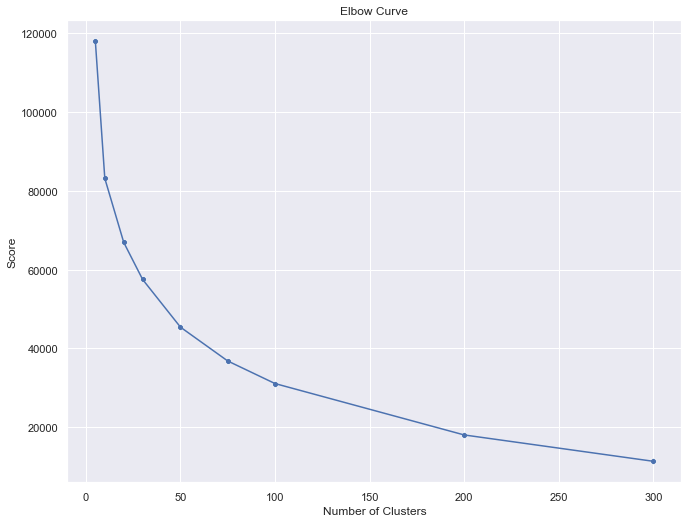

In [28]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

Debido a la extensa cantidad de datos es dificil observar cual el valor óptimo de clusters, porque si tuviesemos un arreglo de 1 hasta 500 quizas se vería reflejada con mayor claridad la regla del codo, pero a priori no hay ningún punto claro en el que se produzca el punto de inflexión. Quizás podríamos decir el 100 porque las rectas que le siguen son relativamente cercanas a la recta horizontal, sin embargo sería bueno probar con valores entre medio o quizás más pero eso implicaría mucho consumo de memoria del computador sobre el que se esté trabajando